C:\Users\LDCC\anaconda3\lib\site-packages\urllib3\connectionpool.py:979: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.naver.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


'\n<!doctype html>                <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메인에서 다양한 
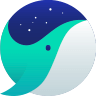
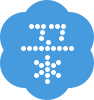

In [11]:
import requests
page = requests.get("https://www.naver.com", verify=False)
type(page)

page.text

In [ ]:
import requests

# 코드를 작성하세요
rating_pages = []
for year in range(2010, 2019):
    for month in range(1, 13):
        for week in range(0, 5):
            url= 'https://workey.codeit.kr/ratings/index?year={}&month={}&weekIndex={}'.format(year, month, week)
            page = requests.get(url)
            rating_pages.append(page.text)
# 테스트 코드
# print(rating_pages)

print(len(rating_pages)) # 가져온 총 페이지 수 
print(rating_pages[0]) # 첫 번째 페이지의 HTML 코드

## 13. 웹 페이지를 Data Frame으로 변경

In [ ]:
import time
import pandas as pd
import requests
from bs4 import BeautifulSoup

# 빈 리스트 생성
records = []

# 시작 페이지 지정
page_num = 1

while True:
    # HTML 코드 받아오기
    response = requests.get("http://www.ssg.com/search.ssg?target=all&query=nintendo&page=" + str(page_num))

    # BeautifulSoup 타입으로 변형하기
    soup = BeautifulSoup(response.text, 'html.parser')

    # "prodName" 클래스가 있을 때만 상품 정보 가져오기
    if len(soup.select('.csrch_tip')) == 0:
        product_names = soup.select('.cunit_info > div.cunit_md.notranslate > div > a > em.tx_ko')
        product_prices = soup.select('.cunit_info > div.cunit_price.notranslate > div.opt_price > em')
        product_urls = soup.select('.cunit_prod > div.thmb > a > img')
        page_num += 1
        time.sleep(3)
        
        # 상품의 정보를 하나의 레코드로 만들고, 리스트에 순서대로 추가하기
        for i in range(len(product_names)):
            record = []
            record.append(product_names[i].text)
            record.append(product_prices[i].text.strip())
            record.append("https://www.ssg.com" + product_urls[i].get('src'))
            records.append(record)
    else:
        break

# DataFrame 만들기
df = pd.DataFrame(data = records, columns = ["이름", "가격", "이미지 주소"])

# DataFrame 출력
df.head()